Random Sampling
=============

## *Sample mean*  | *Standard error*  | *CLT* | *Class* | *Inheritance*

Copyright 2016 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
numpy.random.seed(18)

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

Part One
========

Suppose we want to estimate the average weight of men and women in the U.S.

And we want to quantify the uncertainty of the estimate.

One approach is to simulate many experiments and see how much the results vary from one experiment to the next.

I'll start with the unrealistic assumption that we know the actual distribution of weights in the population.  Then I'll show how to solve the problem without that assumption.

Based on data from the [BRFSS](http://www.cdc.gov/brfss/), I found that the distribution of weight in kg for women in the U.S. is well modeled by a lognormal distribution with the following parameters:

In [2]:
### rvs(s, loc=0, scale=1, size=1, random_state=None)... s = std, loc=?, scale = mu or mean
weight = scipy.stats.lognorm(0.23, 0, 70.8)
weight.mean(), weight.std()

(72.697645732966876, 16.944043048498038)

In [4]:
72.69-4*16.944
72.69+4*16.944

140.466

Here's what that distribution looks like:

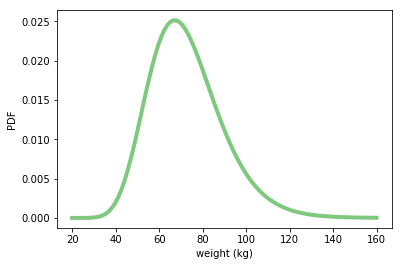

In [7]:
#xs1 = numpy.linspace(72.69-4*16.944, 72.69+4*16.944, 100)
xs = numpy.linspace(20, 160, 100)
ys = weight.pdf(xs)

pyplot.plot(xs, ys, linewidth=4, color=COLOR1)
pyplot.xlabel('weight (kg)')
pyplot.ylabel('PDF')
None

`make_sample` draws a random sample from this distribution.  The result is a NumPy array.

In [15]:
def make_sample(n=100):
    sample = weight.rvs(n)
    return sample

Here's an example with `n=100`.  The mean and std of the sample are close to the mean and std of the population, but not exact.

In [16]:
sample = make_sample(n=100)
sample.mean(), sample.std()

(72.598533436880757, 19.994458600775435)

In [17]:
sample

array([  50.24970352,   57.72082264,   78.09129916,   55.43404966,
         69.06517402,   45.97048038,   83.08523399,   56.70088077,
         55.43298558,   57.76647917,   81.747621  ,   78.8961367 ,
         52.58933599,   78.41419976,   69.89336459,   60.12127542,
         63.30539851,   72.424939  ,   62.06221259,   64.024518  ,
         62.37278793,   71.07768849,   94.14961117,   70.43270582,
         67.94856059,   68.77128402,   88.87637065,   62.26867137,
         51.49187994,   52.96674461,   80.14943528,   93.88620922,
         47.72773842,   65.56651548,   84.11527178,   91.93453369,
         34.58965004,   65.51431562,   82.20845216,   45.93024089,
        175.52517313,   56.70830827,   93.44641789,   75.53588494,
         83.19854272,  123.50034345,   66.83312385,   74.97523191,
         81.10257363,   80.76442443,   82.38915396,   92.03436868,
         69.41219277,   65.79697338,   46.1476299 ,  103.05239482,
         81.18014467,   52.46369161,  108.57783349,  101.21607

In [21]:
def make_sample(n):
    sample = weight.rvs(n)
    return sample

def sample_stat(sample):
    return sample.mean()

def compute_sampling_distribution(n, iters):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return numpy.array(stats)

sample_means = compute_sampling_distribution(100, 1000)
sample_means
    

array([ 71.19504425,  71.8256916 ,  71.2694367 ,  73.46514323,
        72.44799977,  71.48578733,  74.74105024,  74.6133219 ,
        70.35350972,  67.77059063,  73.35582143,  72.27039557,
        73.09032846,  70.43640764,  73.85518475,  74.36070264,
        74.44497957,  72.70013932,  72.34591149,  76.14183763,
        74.7584448 ,  70.88445923,  72.82417259,  72.14685202,
        76.61658516,  71.28137032,  71.70621823,  68.75862461,
        67.32427017,  73.26388149,  73.13926316,  72.83381017,
        71.585441  ,  72.43029117,  74.84449025,  75.05001079,
        73.4333027 ,  70.24198375,  70.88077361,  71.98341929,
        74.62963869,  71.45390632,  71.47802986,  72.14360452,
        70.60473144,  73.72445186,  73.03708902,  72.36704115,
        74.43174587,  70.58821777,  68.77025466,  75.20865251,
        73.23072393,  74.46190979,  74.27043205,  74.1352202 ,
        69.16667696,  71.76837323,  71.22525139,  69.43972305,
        71.90738058,  75.40071283,  76.53405845,  74.42

We want to estimate the average weight in the population, so the "sample statistic" we'll use is the mean:

In [18]:
def sample_stat(sample):
    return sample.mean()

One iteration of "the experiment" is to collect a sample of 100 women and compute their average weight.

We can simulate running this experiment many times, and collect a list of sample statistics.  The result is a NumPy array.

In [31]:
def compute_sampling_distribution(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return numpy.array(stats)

The next line runs the simulation 1000 times and puts the results in
`sample_means`:

In [ ]:
sample_means = compute_sampling_distribution(n=100, iters=1000)

Let's look at the distribution of the sample means.  This distribution shows how much the results vary from one experiment to the next.

Remember that this distribution is not the same as the distribution of weight in the population.  This is the distribution of results across repeated imaginary experiments.

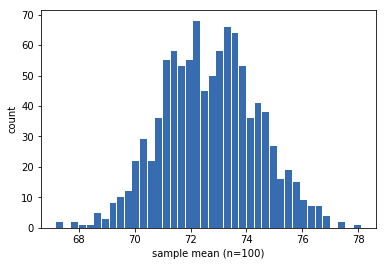

In [26]:
pyplot.hist(sample_means, color=COLOR5, rwidth=0.9, bins = 40)
pyplot.xlabel('sample mean (n=100)')
pyplot.ylabel('count')
None

The mean of the sample means is close to the actual population mean, which is nice, but not actually the important part.

In [27]:
sample_means.mean()

72.700790940226256

#### The standard deviation of the sample means quantifies the variability from one experiment to the next, and reflects the precision of the estimate.

# This quantity is called the "standard error".

In [28]:
std_err = sample_means.std()
std_err

1.7095610506700989

We can also use the distribution of sample means to compute a "90% confidence interval", which contains 90% of the experimental results:

In [30]:
conf_int = numpy.percentile(sample_means, [5,95])

#conf_int = numpy.percentile(sample_means, [5, 95])
conf_int

array([ 69.96057332,  75.58582662])

Now we'd like to see what happens as we vary the sample size, `n`.  The following function takes `n`, runs 1000 simulated experiments, and summarizes the results.

In [44]:
def plot_sampling_distribution(n, xlim=None):
    """Plot the sampling distribution.
    
    n: sample size
    xlim: [xmin, xmax] range for the x axis 
    """
    sample_stats = compute_sampling_distribution(n, iters=1000)
    se = numpy.std(sample_stats)
    cv = numpy.std(sample_stats)/numpy.mean(sample_stats)
    ci = numpy.percentile(sample_stats, [5, 95])
    
    pyplot.hist(sample_stats, color=COLOR2)
    pyplot.xlabel('sample statistic')
    pyplot.xlim(xlim)
    text(0.7, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
    text(0.03, 0.85, 'SE %0.2f' % se)
    text(0.78, 0.9, 'CV %0.2f' % cv)
    pyplot.show()
    
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = pyplot.gca()
    pyplot.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

Here's a test run with `n=100`:

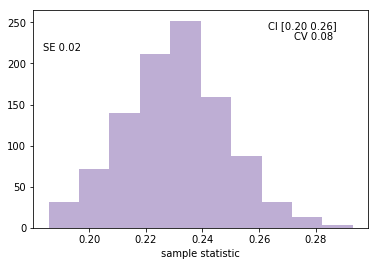

In [45]:
plot_sampling_distribution(100)

Now we can use `interact` to run `plot_sampling_distribution` with different values of `n`.  Note: `xlim` sets the limits of the x-axis so the figure doesn't get rescaled as we vary `n`.

In [47]:
#def sample_stat(sample):
    #return sample.mean()

slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution, n=slider, xlim=fixed([55, 95]))
None

# The above interactive plot demonstrates visually how the CLT playsout in real world. As the sample size increases:
> the std error goes down 
>> sample means start to coverge towards the real population mean
>>> coeff of variance (std/mean) also shrinks but not as dramatically as std err
>>>> ci or confidence interval shrinks

### Other sample statistics

This framework works with any other quantity we want to estimate.  By changing `sample_stat`, you can compute the SE and CI for any sample statistic.

**Exercise 1**: Fill in `sample_stat` below with any of these statistics:

* Standard deviation of the sample.
* Coefficient of variation, which is the sample standard deviation divided by the sample standard mean.
* Min or Max
* Median (which is the 50th percentile)
* 10th or 90th percentile.
* Interquartile range (IQR), which is the difference between the 75th and 25th percentiles.

NumPy array methods you might find useful include `std`, `min`, `max`, and `percentile`.
Depending on the results, you might want to adjust `xlim`.

In [49]:
def sample_stat(sample):
    #return sample.std()/sample.mean()
    return sample.mean()

slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution, n=slider, xlim=fixed([0, 100]))
None

STOP HERE
---------

We will regroup and discuss before going on.

Part Two
========

So far we have shown that if we know the actual distribution of the population, we can compute the sampling distribution for any sample statistic, and from that we can compute SE and CI.

But in real life we don't know the actual distribution of the population.  If we did, we wouldn't be doing statistical inference in the first place!

In real life, we use the sample to build a model of the population distribution, then use the model to generate the sampling distribution.  A simple and popular way to do that is "resampling," which means we use the sample itself as a model of the population distribution and draw samples from it.

Before we go on, I want to collect some of the code from Part One and organize it as a class.  This class represents a framework for computing sampling distributions.

In [68]:
class Resamlper(object):
    def __init__(self, sample, xlim=None):
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
    def resample(self):
        new_sample = numpy.random.choice(self.sample, self.n, replace = True)
        return new_sample
    def sample_stat(self, sample):
        return sample.mean()
    def compute_sampling_distribution(self, iters = 1000):
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
    def plot_sampling_distribution(self):
        pyplot.hist(self.compute_sampling_distribution(), color = COLOR2)
        se = self.compute_distribution.std()
        ci = numpy.percentile(self.compute_distribution(), [5,95])
        
        pyplot.xlable('sample statistics')
        pyplot.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' %tuple(ci))
        text(0.03, 0.95, 'SE [%0.2f]' %se)
        pyplot.show()
        

# class Resampler(object):
#     """Represents a framework for computing sampling distributions."""
    
#     def __init__(self, sample, xlim=None):
#         """Stores the actual sample."""
#         self.sample = sample
#         self.n = len(sample)
#         self.xlim = xlim
        
#     def resample(self):
#         """Generates a new sample by choosing from the original
#         sample with replacement.
#         """
#         new_sample = numpy.random.choice(self.sample, self.n, replace=True)
#         return new_sample
    
#     def sample_stat(self, sample):
#         """Computes a sample statistic using the original sample or a
#         simulated sample.
#         """
#         return sample.mean()
    
#     def compute_sampling_distribution(self, iters=1000):
#         """Simulates many experiments and collects the resulting sample
#         statistics.
#         """
#         stats = [self.sample_stat(self.resample()) for i in range(iters)]
#         return numpy.array(stats)
    
#     def plot_sampling_distribution(self):
#         """Plots the sampling distribution."""
#         sample_stats = self.compute_sampling_distribution()
#         se = sample_stats.std()
#         ci = numpy.percentile(sample_stats, [5, 95])
    
#         pyplot.hist(sample_stats, color=COLOR2)
#         pyplot.xlabel('sample statistic')
#         pyplot.xlim(self.xlim)
#         text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
#         text(0.03, 0.85, 'SE %0.2f' % se)
#         pyplot.show()

The following function instantiates a `Resampler` and runs it.

In [71]:
def interact_func(n, xlim):
    sample = weight.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

Here's a test run with `n=100`

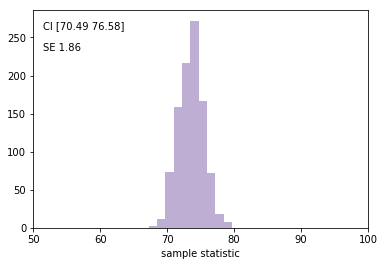

In [72]:
interact_func(n=100, xlim=[50, 100])

In [73]:
def greeting(text="World"):
        print("Hello {}".format(text))
interact(greeting, text="IPython Widgets")
#greeting()


<function __main__.greeting>

Now we can use `interact_func` in an interaction:

In [74]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func, n=slider, xlim=fixed([50, 100]))
None

**Exercise 2**: write a new class called `StdResampler` that inherits from `Resampler` and overrides `sample_stat` so it computes the standard deviation of the resampled data.

In [76]:
# Solution goes here
#sample = weight.rvs(100)
class StdResampler(Resampler):
    def sample_stats(self, sample):
        return sample.std()



Test your code using the cell below:

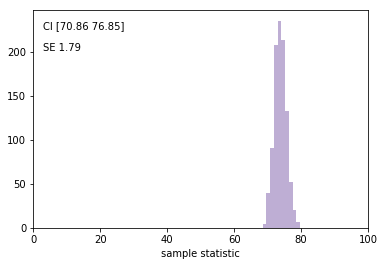

In [77]:
def interact_func2(n, xlim):
    sample = weight.rvs(n)
    resampler = StdResampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()
    
interact_func2(n=100, xlim=[0, 100])

When your `StdResampler` is working, you should be able to interact with it:

In [78]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func2, n=slider, xlim=fixed([0, 100]))
None

STOP HERE
---------

We will regroup and discuss before going on.

Part Three
==========

We can extend this framework to compute SE and CI for a difference in means.

For example, men are heavier than women on average.  Here's the women's distribution again (from BRFSS data):

In [79]:
female_weight = scipy.stats.lognorm(0.23, 0, 70.8)
female_weight.mean(), female_weight.std()

(72.697645732966876, 16.944043048498038)

And here's the men's distribution:

In [83]:
male_weight = scipy.stats.lognorm(0.20, 0, 87.3)
male_weight.mean(), male_weight.std()

(89.063576984335782, 17.992335889366288)

I'll simulate a sample of 100 men and 100 women:

In [84]:
female_sample = female_weight.rvs(100)
male_sample = male_weight.rvs(100)

The difference in means should be about 17 kg, but will vary from one random sample to the next:

In [85]:
male_sample.mean() - female_sample.mean()

17.002698801463069

Here's the function that computes Cohen's effect size again:

In [86]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

The difference in weight between men and women is about 1 standard deviation:

In [87]:
CohenEffectSize(male_sample, female_sample)

0.98349023337858987

Now we can write a version of the `Resampler` that computes the sampling distribution of $d$.

In [88]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2, xlim=None):
        self.group1 = group1
        self.group2 = group2
        self.xlim = xlim
        
    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = numpy.random.choice(self.group1, n, replace=True)
        group2 = numpy.random.choice(self.group2, m, replace=True)
        return group1, group2
    
    def sample_stat(self, groups):
        group1, group2 = groups
        return CohenEffectSize(group1, group2)

Now we can instantiate a `CohenResampler` and plot the sampling distribution.

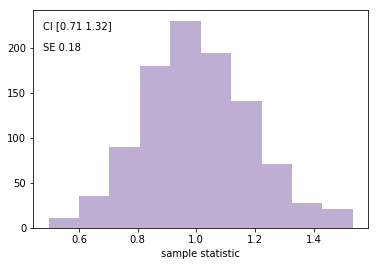

In [89]:
resampler = CohenResampler(male_sample, female_sample)
resampler.plot_sampling_distribution()

This example demonstrates an advantage of the computational framework over mathematical analysis.  Statistics like Cohen's $d$, which is the ratio of other statistics, are relatively difficult to analyze.  But with a computational approach, all sample statistics are equally "easy".

One note on vocabulary: what I am calling "resampling" here is a specific kind of resampling called "bootstrapping".  Other techniques that are also considering resampling include permutation tests, which we'll see in the next section, and "jackknife" resampling.  You can read more at <http://en.wikipedia.org/wiki/Resampling_(statistics)>.

# Inheritance

Classes can inherit functionality of other classes. If an object is created using a class that inherits from a superclass, the object will contain the methods of both the class and the superclass. The same holds true for variables of both the superclass and the class that inherits from the super class.

In [63]:
class User:
 
    def __init__(self, name):
        self.name = name
 
    def printName(self):
        print("Name  = {}" .format(self.name))

In [65]:
brian = User("brian")
brian.printName()

Name  = brian


In [66]:
class Programmer(User):
    def __init__(self, name):
        self.name = name
 
    def doPython(self):
        print ("Programming Python")

In [67]:
brian = User("brian")
brian.printName()
 
diana = Programmer("Diana")
diana.printName()
diana.doPython()

Name  = brian
Name  = Diana
Programming Python
